# Practice RNN Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Analize data

In [2]:
milk = pd.read_csv('./monthly-milk-production.csv', index_col='Month')

In [3]:
milk.index = pd.to_datetime(milk.index)

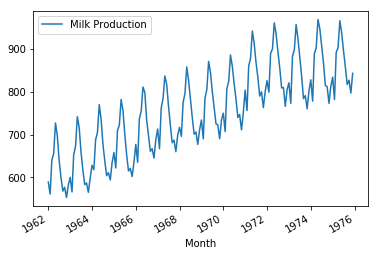

In [4]:
milk.plot()

In [5]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


# Prepare train and test data

In [6]:
train_set = milk.head(156)

In [7]:
test_set = milk.tail(12)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
train_scaled = scaler.fit_transform(train_set)

In [11]:
test_scaled = scaler.transform(test_set)

In [12]:
def next_pair(training_data,steps): 
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(steps, 1), y_batch[:, 1:].reshape(steps, 1)

In [13]:
def create_training_data(training_data,steps, train_size):
    pairs= [next_pair(training_data,steps) for i in range(train_size)]
    X = np.array([x[0] for x in pairs])
    y = np.array([x[1] for x in pairs])
    return X, y

# Define Parameters

In [14]:
NUM_STEPS = 10
TRAIN_SIZE = 1000
NUM_NEURONS = 100
DIM =1

In [15]:
X, y = create_training_data(train_scaled, NUM_STEPS, TRAIN_SIZE)

# Define model

In [16]:
from keras import layers
import keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
model = keras.models.Sequential()
model.add(layers.recurrent.LSTM(NUM_NEURONS, return_sequences=True, input_shape=(NUM_STEPS, DIM)))
model.add(layers.Dense(DIM))
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_path = 'rnn-timeseries.png'

In [32]:
from keras.utils import plot_model
plot_model(model, model_path, show_shapes=True)

Populating the interactive namespace from numpy and matplotlib


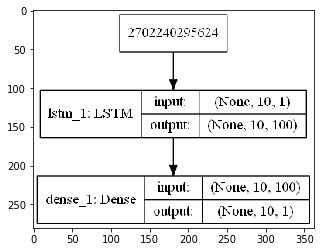

In [33]:
%pylab inline
import matplotlib.image as mpimg
img=mpimg.imread(model_path)
imgplot = plt.imshow(img)
plt.show()

# Training

In [20]:
model.fit(X, y, batch_size=1, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0205
Epoch 2/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0097
Epoch 3/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0086
Epoch 4/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0077
Epoch 5/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0072


# Testing

In [21]:
test_x, test_y = next_pair(test_scaled, NUM_STEPS)

In [22]:
pred_y = model.predict(test_x.reshape(1, NUM_STEPS, DIM))

In [23]:
pred_y

array([[[0.6396802 ],
        [0.5665897 ],
        [0.8081792 ],
        [0.9291249 ],
        [0.93845844],
        [0.8432618 ],
        [0.7121248 ],
        [0.6412518 ],
        [0.58472234],
        [0.5729375 ]]], dtype=float32)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred_y.reshape(NUM_STEPS))

0.008149534455773995

In [25]:
x = test_scaled[:NUM_STEPS]
x = list(x.reshape(-1))
print(x)
ret = []
for i in range(100):
    pred = model.predict(np.array(x[-NUM_STEPS:]).reshape(1, NUM_STEPS, DIM))
    x.append(pred[0][-1][0])


[0.6754807692307694, 0.5504807692307694, 0.814903846153846, 0.841346153846154, 0.9927884615384615, 0.9230769230769231, 0.8245192307692311, 0.7331730769230769, 0.6346153846153846, 0.6586538461538463]


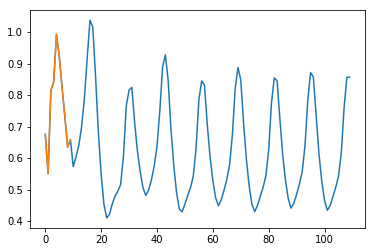

In [26]:
plt.plot(range(len(x)), x)
plt.plot(range(len(test_scaled[:NUM_STEPS])),test_scaled[:NUM_STEPS] )